In [1]:
# conda list --export > requirements_conda.txt

In [1]:
from tools.dset_getters import dummy_dset, cvsi_dset

dset = dummy_dset()
dset.__getitem__(0)

(tensor([6, 9, 1, 4, 8, 7, 4, 7, 6, 6, 6, 0, 6, 4, 9, 6, 3, 7, 3, 2, 3, 4, 4, 1,
         9, 1, 2, 4, 3, 4, 3, 1, 5, 8, 1, 1, 7, 9, 1, 3, 8, 3, 4, 5, 8, 0, 9, 2,
         6, 5, 6, 5, 3, 7, 5, 9, 7, 9, 7, 7, 6, 0, 2, 9, 8, 0, 7, 2, 6, 1, 7, 9,
         5, 1, 2, 1, 6, 9, 1, 8, 6, 1, 2, 3, 1, 0, 5, 9, 9, 0, 7, 8, 8, 5, 7, 2,
         3, 5, 0, 2], device='cuda:0'),
 tensor(0., device='cuda:0', dtype=torch.float64))

In [1]:
from tools.dset_getters import dummy_dset, cvsi_dset

dset = cvsi_dset(None)
dset.__getitem__(0)


(tensor([3, 3, 1, 0, 0, 2, 0, 3, 3, 3, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1,
         2, 2, 0, 0, 1, 0, 1, 3, 0, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 2, 3,
         3, 0, 0, 0, 3, 3, 1, 1, 2, 0, 3, 1, 3, 1, 0, 2, 1, 2, 1, 2, 3, 0, 1, 0,
         3, 1, 0, 2, 1, 0, 0, 3, 3, 0, 0, 1, 2, 2, 2, 0, 3, 2, 0, 3, 1, 2, 1, 1,
         1, 0, 2, 0], device='cuda:0'),
 tensor(0, device='cuda:0'))

In [1]:
from torchtext.datasets import AG_NEWS, AmazonReviewFull, SogouNews
from torchtext.data.functional import to_map_style_dataset
from tools.dset_getters import cvsi_dset

#TODO uninstall torchtext after check

# train_iter = AG_NEWS(split='test')
# train_iter = AmazonReviewFull(split='test')
train_iter = SogouNews(split='test')

dset = to_map_style_dataset(train_iter)


print(dset)
print(type(dset))

print(dset.__getitem__(0))

dset = cvsi_dset('train')


print(dset)
print(type(dset))

print(dset.__getitem__(0))


<torchtext.data.functional.to_map_style_dataset.<locals>._MapStyleDataset object at 0x7f83002a3ac0>
<class 'torchtext.data.functional.to_map_style_dataset.<locals>._MapStyleDataset'>
(1, ' ti3 ca1o shi4 jie4 be1i : che2ng fe1i na2 pi2ng he2ng mu4 zi4 yo2u ca1o ji1n pa2i  su4 du4 : ( shuo1 mi2ng : dia3n ji1 zi4 do4ng bo1 fa4ng )\\n  shuo1 mi2ng : dia3n ji1 ga1i a4n niu3 , xua3n ze2 yi1 lu4n ta2n ji2 ke3 ')
<class 'tools.dset_getters.cvsi_dset'>
('TTCCCCAAGGGAATTACCCCAGGTTGTGTGTTGACCTACGGGGAGACGTAGTGAGTCACGTGAGTCAGTGATGACCAATACTGGACCACCCGCAAGGACCGAGGTGAGACACTCAGTTTCTCGAAACCACATACAAGGATACGACCCATTTTATAGAGTGCGACTTGTATGATAGCTTTGCCAACTTAGGTTTTGGTCAA', 0)


In [3]:
from tools.basic_model import NeuralNetwork
from tools.dset_getters import dummy_dset, cvsi_dset
from torch.utils.data import DataLoader
import torch 
import numpy as np

# dset = cvsi_dset('train')
dset = cvsi_dset('test')



dummy = NeuralNetwork(4).cuda()

def coll(batch):
    #TODO ohe
    mapper = {
        'A':0,
        'C':1,
        'T':2,
        'G':3,
    }
    xs, ys = [],[]
    for text,label in batch:
        ys.append(torch.tensor(label, dtype=torch.int64))
        # xs.append(torch.tensor([mapper[ch] for ch in text]).to('cuda'))
        xs.append(torch.tensor([mapper[ch] for ch in text], dtype=torch.float32)) #TODO int doesnt work, why?
    
    #Padding, numericalization, tokenization here

    xs = torch.stack(xs)
    ys = torch.stack(ys)
    return xs.to('cuda'),ys.to('cuda')
    

loader = DataLoader(dset, batch_size=4, shuffle=False, collate_fn=coll)

for el in loader:
    # print('loader element')
    # print(el)
    x,y = el
    # print(x)
    # print(y)
    # print(x.shape)
    print(dummy(x))
    break

tensor([[0.1960, 0.2673, 0.2483, 0.2590],
        [0.2705, 0.3102, 0.2069, 0.2036],
        [0.1963, 0.1542, 0.2145, 0.2468],
        [0.3372, 0.2683, 0.3303, 0.2905]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)


In [2]:
from tools.loc2seq.with_biopython import create_seq_genomic_dataset
from pathlib import Path
dset_path = Path('./datasets/demo_coding_vs_intergenomic_seqs')
# destination_path = Path('./datasets/translated_demo_coding_vs_intergenomic_seqs')

create_seq_genomic_dataset(dset_path, force_download=True)

# TODO add to conda reqs
# !pip install pyyaml
# !pip install biopython
# !pip install ipywidgets

/home/martinekvlastimil95/repos/genomic_benchmarks/tools/loc2seq/with_biopython.py:76: UserWarning: No version specified. Using version 0.
  warnings.warn(f"No version specified. Using version {metadata['version']}.")


/home/martinekvlastimil95/.genomic_benchmarks/fasta/Homo_sapiens.GRCh38.dna.toplevel.fa.gz: 0.00B [00:00, ?B/s…

/home/martinekvlastimil95/.genomic_benchmarks/fasta/Homo_sapiens.GRCh38.cdna.all.fa.gz: 0.00B [00:00, ?B/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/190000 [00:00<?, ?it/s]

PosixPath('/home/martinekvlastimil95/.genomic_benchmarks/demo_coding_vs_intergenomic_seqs')

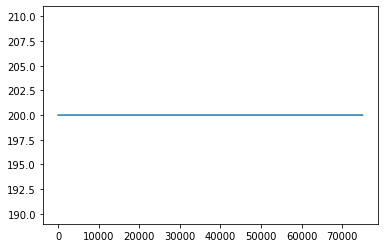

In [1]:
from tools.basic_model import NeuralNetwork
from tools.dset_getters import cvsi_dset_translated
from torch.utils.data import DataLoader
from tools.utils import coll

train_dset = cvsi_dset_translated('train')
train_loader = DataLoader(train_dset, batch_size=32, shuffle=True, collate_fn=coll)

model = NeuralNetwork(number_of_classes=1).cuda()
model.train(train_loader, epochs=5)

test_dset = cvsi_dset_translated('test')
test_loader = DataLoader(test_dset, batch_size=32, shuffle=True, collate_fn=coll)
model.test(test_loader)







Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Test Error: 
 Accuracy: 50.0%, Avg loss:0.692366 

